# Part 1: Data Loading and Exploration

This section loads the three claims data files (HEADER, LINE, CODE) and performs exploratory analysis. I review dataset structure, assess missing values, summarize numeric fields, and calculate metrics including unique claim counts, service date ranges, and average service line and diagnosis code counts per claim.


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Loading the Claims Data

The dataset consists of three CSV files:

- **HEADER file**: One row per claim which includes provider NPIs, service dates, payer information, and place of service.
- **LINE file**: One row per service line which includes CPT/HCPCS codes, modifiers, charges, and units.
- **CODE file**: One row per diagnosis code attached to each claim.

Below, I load each file into a pandas DataFrame for more in depth analysis.


In [6]:
# File paths for the claims data
header_path = "../data/STONYBRK_20240531_HEADER.csv"
line_path = "../data/STONYBRK_20240531_LINE.csv"
code_path = "../data/STONYBRK_20240531_CODE.csv"

# Load into DataFrames
df_header = pd.read_csv(header_path)
df_line = pd.read_csv(line_path)
df_code = pd.read_csv(code_path)


In [7]:
df_header.head()


,ClientId,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,Facility_Location,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
1,49,35235657,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
2,49,35249003,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
3,49,35249014,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN
4,49,35249016,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,INPATIENT,4,TESNJ,21,COMPLIANCE AUDIT,317,0,NaN,NaN,NaN


## Dataset Structure and Overview

To understand the structure of the claims dataset, I display:

- The shape (rows and columns) of each DataFrame  
- Column names and data types  
- The general structure of each file  

This helps verify that the files were loaded correctly and gives an initial understanding of the dataset.


In [7]:
df_header.shape, df_line.shape, df_code.shape

df_header.info()
df_line.info()
df_code.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ClientId                 388 non-null    int64  
 1   ProspectiveClaimId       388 non-null    int64  
 2   ClaimType                388 non-null    object 
 3   BillingProviderNPI       388 non-null    int64  
 4   BillingProvFirstName     388 non-null    object 
 5   BillingProvLastName      0 non-null      float64
 6   AttendingProviderNPI     2 non-null      float64
 7   AttendingProvFirstName   2 non-null      object 
 8   AttendingProvLastName    2 non-null      object 
 9   RenderingProviderNPI     388 non-null    int64  
 10  RenderingProvFirstName   388 non-null    object 
 11  RenderingProvLastName    388 non-null    object 
 12  ReferringProviderNPI     87 non-null     float64
 13  ReferringProvFirstName   87 non-null     object 
 14  ReferringProvLastName    8

## Missing Values

The table below displays the number of missing values in each dataset. Some provider name fields in the HEADER file are missing since they are not applicable to every claim. Many fields in the CODE file such as CodeFromDate, CodeToDate, CodeAmnt, POAlnd are missing for all the rows because this data set does not provide those fields. This is important because it helps know which data is missing and helps confirm accurate analysis and merges. 


In [8]:
df_header.isna().sum()
df_line.isna().sum()
df_code.isna().sum()


ClientId                 0
ProspectiveClaimId       0
CodeQualifier            0
CodePos                  0
CodeValue                0
CodeFromDate          1536
CodeToDate            1536
CodeAmnt              1536
POAInd                1536
dtype: int64

## Basic Descriptive Statistics

Below is a generate descriptive statistics for numeric columns in the LINE file. This provides insight into the distribution of charges, units, and other numeric fields associated with service lines.


In [9]:
df_line.describe()


,ClientId,ProspectiveClaimId,LinePos,RevCode,Modifier3,Modifier4,DxMap1,DxMap2,DxMap3,DxMap4,Units,Charges,PlaceOfService,NDC,NDCUnits,NDCRx,NDCUnitQualifier,RenderingProvNPI,CoderId
count,520.0,5.200000e+02,520.000000,0.0,0.0,0.0,520.000000,340.000000,232.000000,167.000000,520.0,520.000000,520.000000,0.0,0.0,0.0,0.0,0.0,520.0
mean,49.0,3.672637e+07,1.401923,NaN,NaN,NaN,1.150000,2.082353,3.064655,4.017964,1.0,455.521154,16.648077,NaN,NaN,NaN,NaN,NaN,4.0
std,0.0,3.278837e+05,0.861282,NaN,NaN,NaN,0.576181,0.433461,0.446391,0.445500,0.0,408.596021,5.041370,NaN,NaN,NaN,NaN,NaN,0.0
min,49.0,3.521699e+07,1.000000,NaN,NaN,NaN,1.000000,1.000000,1.000000,1.000000,1.0,0.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
25%,49.0,3.669946e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,255.000000,11.000000,NaN,NaN,NaN,NaN,NaN,4.0
50%,49.0,3.683102e+07,1.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,330.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
75%,49.0,3.688171e+07,2.000000,NaN,NaN,NaN,1.000000,2.000000,3.000000,4.000000,1.0,515.000000,21.000000,NaN,NaN,NaN,NaN,NaN,4.0
max,49.0,3.700149e+07,7.000000,NaN,NaN,NaN,6.000000,6.000000,7.000000,8.000000,1.0,2580.000000,23.000000,NaN,NaN,NaN,NaN,NaN,4.0


## Summary Indicators

The following metrics summarize key characteristics of the claims dataset:

- **Number of unique claims**
- **Service date range (minimum and maximum dates)**
- **Average number of service lines per claim**
- **Average number of diagnosis codes per claim**

These metrics help understand how many claims were submitted, and the complexity of the claims in regards to service lines and diagnosis codes.


In [23]:
# Unique claims
print("Unique claims:", df_header["ProspectiveClaimId"].nunique())

# Date range
df_header["ServiceFromDate"] = pd.to_datetime(df_header["ServiceFromDate"])
df_header["ServiceToDate"] = pd.to_datetime(df_header["ServiceToDate"])
print("Date range:", df_header["ServiceFromDate"].min(), "to", df_header["ServiceToDate"].max())

# Avg lines per claim
lines_per_claim = df_line.groupby("ProspectiveClaimId")["LinePos"].count()
print("Avg lines per claim:", lines_per_claim.mean())

# Avg dx per claim
dx_per_claim = df_code.groupby("ProspectiveClaimId")["CodePos"].count()
print("Avg dx per claim:", dx_per_claim.mean())


Unique claims: 388
Date range: 2023-09-25 00:00:00 to 2024-05-29 00:00:00
Avg lines per claim: 1.3402061855670102
Avg dx per claim: 3.9587628865979383


# Part 2: Relational Data Analysis

## Question 1: Provider Analysis
Who are the top 5 billing providers by number of claims?


In [42]:
provider_claims = (
    df_header.groupby("BillingProviderNPI")["ProspectiveClaimId"]
    .nunique()
    .reset_index(name="claim_count")
)

# Filter providers with meaningful volume
filtered_providers = provider_claims[provider_claims["claim_count"] >= 5]

top_providers = filtered_providers.sort_values("claim_count", ascending=False).head(10)

# Display the numeric output table
top_providers




,BillingProviderNPI,claim_count
5,1821035601,152
0,1063468536,81
2,1154376309,69
4,1538114723,40
3,1437105905,36
1,1083660575,9


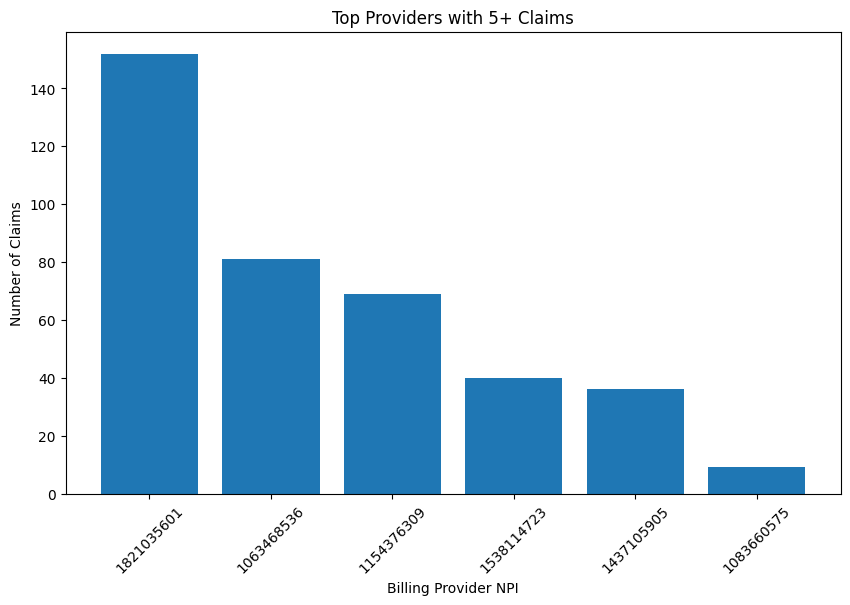

In [43]:
# Bar chart
plt.figure(figsize=(10,6))
plt.bar(top_providers["BillingProviderNPI"].astype(str), top_providers["claim_count"])
plt.xlabel("Billing Provider NPI")
plt.ylabel("Number of Claims")
plt.title("Top Providers with 5+ Claims")
plt.xticks(rotation=45)
plt.show()


### Interpretation

Limiting the analysis to providers with five or more claims reveals that one provider accounts for a noticeably larger share of total claim activity. This indicates that claim volume is unevenly distributed across providers.





## Question 2: Payer Mix Analysis

This section identifies the top 5 primary payers by claim volume. The percentage of total claims attributed to each payer was also calculated and had visualized the payer distribution with a bar chart.


In [12]:
# Top 5 primary payers by claim volume
payer_counts = (
    df_header["PrimaryPayerName"]
    .value_counts()
    .reset_index()
)

payer_counts.columns = ["PrimaryPayerName", "claim_count"]

# Calculate percentage of total claims
total_claims = payer_counts["claim_count"].sum()
payer_counts["pct_of_claims"] = (payer_counts["claim_count"] / total_claims) * 100

# Select top 5 payers
top5_payers = payer_counts.head(5)
top5_payers


,PrimaryPayerName,claim_count,pct_of_claims
0,MEDICARE,242,62.371134
1,HEALTHFIRST FFS,46,11.855670
2,FIDELIS/BETTER HEALTH PLAN,26,6.701031
3,HIP MEDICAID,17,4.381443
4,HEALTHFIRST CAPITATED,10,2.577320


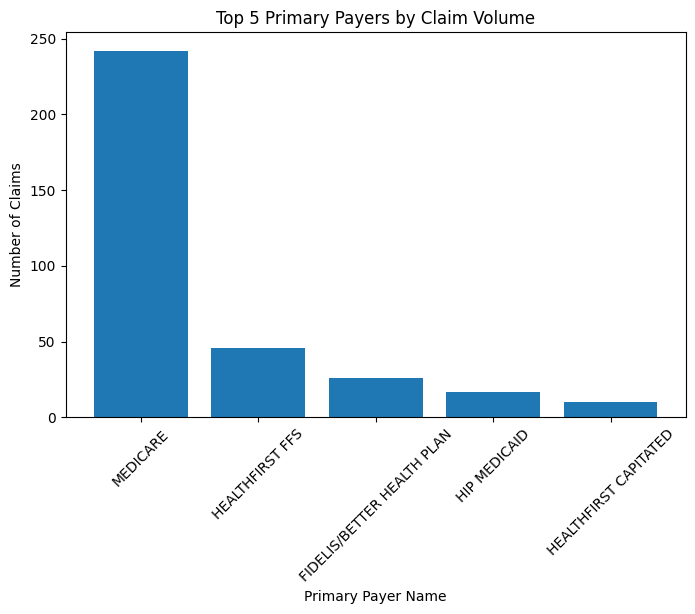

In [13]:
plt.figure(figsize=(8,5))
plt.bar(top5_payers["PrimaryPayerName"], top5_payers["claim_count"])
plt.xlabel("Primary Payer Name")
plt.ylabel("Number of Claims")
plt.title("Top 5 Primary Payers by Claim Volume")
plt.xticks(rotation=45)
plt.show()


### Interpretation

The top five primary payers account for the majority of the claims volume in this dataset, with Medicare contributing the highest number of claims, and Healthfirst Capitated contributing the fewest. The pct_of_claims column shows the exact percentage of total claim volume attributed to each player.


## Question 3: Common Diagnoses

This section identifies the 10 most frequently used ICD-10 diagnosis codes in the claims dataset. The CODE file contains one row per diagnosis code linked to each claim, so counting occurrences shows which diagnoses appear most often.


In [14]:
# Top 10 most frequent diagnosis codes
dx_counts = (
    df_code["CodeValue"]
    .value_counts()
    .reset_index()
)

dx_counts.columns = ["CodeValue", "frequency"]

top10_dx = dx_counts.head(10)
top10_dx


,CodeValue,frequency
0,J96.01,62
1,E78.5,49
2,I10,49
3,G93.5,34
4,D64.9,29
5,I25.10,27
6,I61.9,26
7,I48.91,24
8,I60.8,24
9,I50.9,22


### Interpretation

The table above shows the ten most frequently occurring ICD-10 diagnosis codes in the dataset. Based on the results, J96.01 appears the most often, followed by E78.5 and I10. This further indicates that respiratory failure, hyperlipidemia, and hypertension are one of the most clinical conditions associated with these claims and also reflect the primary medical issues treated within this claim period. 


## Question 4: Common Procedures (HCPCS)

This section identifies the ten most frequently billed CPT/HCPCS procedure codes in the claims dataset. Since the LINE file contians one row per billed service line, counting how often each HCPCS code appears tell us which procedures are performed or billed the most often. 


In [15]:
# Top 10 most frequently billed HCPCS codes
hcpcs_counts = (
    df_line["HCPCS"]
    .value_counts()
    .reset_index()
)

hcpcs_counts.columns = ["HCPCS", "frequency"]

top10_hcpcs = hcpcs_counts.head(10)
top10_hcpcs


,HCPCS,frequency
0,99291,68
1,99233,48
2,99213,39
3,99223,33
4,99222,32
5,99232,21
6,90833,16
7,92557,14
8,99204,14
9,99214,14


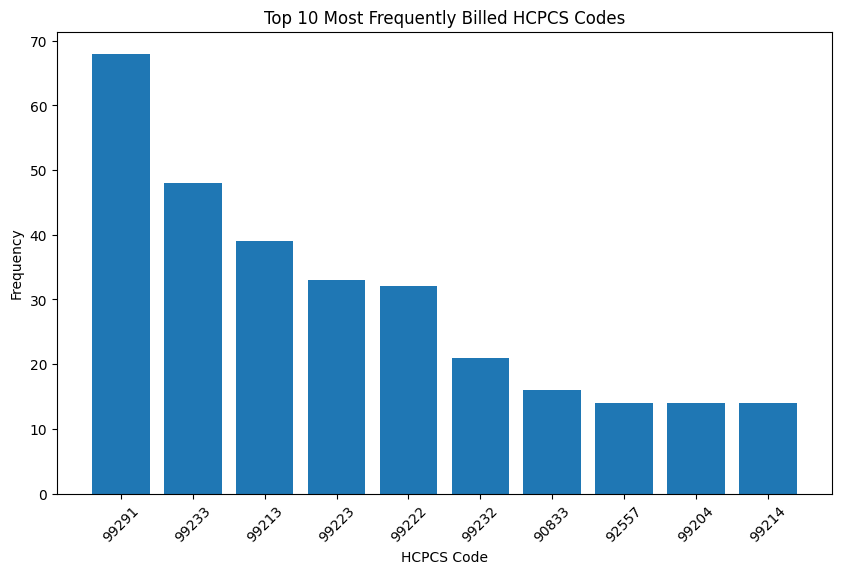

In [16]:
plt.figure(figsize=(10,6))
plt.bar(top10_hcpcs["HCPCS"], top10_hcpcs["frequency"])
plt.xlabel("HCPCS Code")
plt.ylabel("Frequency")
plt.title("Top 10 Most Frequently Billed HCPCS Codes")
plt.xticks(rotation=45)
plt.show()


### Interpretation

The bar chart shows the most frequently billed HCPCS procedure codes in the dataset. These codes represent the procedures or services that appeared most often across all claim line items, indicating high-volume clinical or billing activities.


## Question 5: Service Location Analysis

This section analyzes the distribution of claims by Place of Service. I count how many claims were submitted for each category and calculate the percentage of claims that occurred in different service settings, including inpatient and doctor’s office visits.


In [17]:
# Count claims by place of service
pos_counts = (
    df_header["PlaceOfService"]
    .value_counts()
    .reset_index()
)

pos_counts.columns = ["PlaceOfService", "claim_count"]

# Calculate percentages
total_claims = pos_counts["claim_count"].sum()
pos_counts["pct_of_claims"] = (pos_counts["claim_count"] / total_claims) * 100

pos_counts


,PlaceOfService,claim_count,pct_of_claims
0,21,231,59.536082
1,11,132,34.020619
2,22,24,6.185567
3,23,1,0.257732


In [18]:
inpatient_pct = pos_counts.loc[pos_counts["PlaceOfService"] == "INPATIENT", "pct_of_claims"]
office_pct = pos_counts.loc[pos_counts["PlaceOfService"] == "DOCTOR'S OFFICE", "pct_of_claims"]

inpatient_pct, office_pct


(Series([], Name: pct_of_claims, dtype: float64),
 Series([], Name: pct_of_claims, dtype: float64))

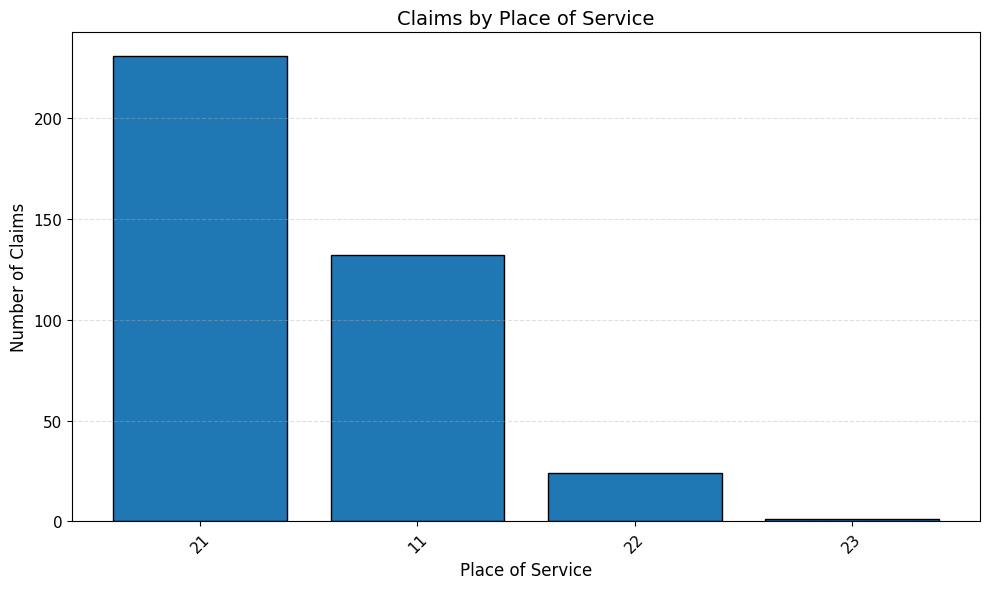

In [32]:
plt.figure(figsize=(10,6))

# Sorted by claim_count for cleaner ordering
sorted_pos = pos_counts.sort_values("claim_count", ascending=False)

plt.bar(
    sorted_pos["PlaceOfService"].astype(str),
    sorted_pos["claim_count"],
    edgecolor="black"
)

plt.xlabel("Place of Service", fontsize=12)
plt.ylabel("Number of Claims", fontsize=12)
plt.title("Claims by Place of Service", fontsize=14)

plt.xticks(rotation=45, fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis="y", linestyle="--", alpha=0.4)

plt.tight_layout()
plt.show()



### Interpretation

**Place of Service Code Reference (CMS Standard)**  
- **21 — Inpatient Hospital**  
- **11 — Doctor’s Office Visit**  
- **22 — Outpatient Hospital**  
- **23 — Emergency Room – Hospital**  

These definitions are used to interpret the distribution of claims in the chart above.

The chart above shows that the most claims occurred in inpatient hospital settings (POS 21,231 claims) followed by doctor's office visits (POS, 11, 132 claims). On the other hand, outpatient hospital services (POS 22, 24 claims) and emergency room visits (POS 23, 1 claim) were less common. This distribution shows that inpatient care represnts the largest share of service utilization during the claim period.


# Part 3: Advanced Analysis with Joins

In this section, I perform more advanced relational analysis by merging the HEADER, LINE, and CODE files. These joins allow deeper investigation into provider behavior, service complexity, diagnosis–procedure relationships, and payer financial impact. Each analysis follows the specific instructions provided in the assignment.


## Question 6: Claims with High Service Line Counts

This analysis merges the HEADER and LINE files to calculate the number of service lines per claim. Claims with five or more service lines are identified, including provider information and total billed charges.


In [8]:
# Merge HEADER and LINE files on ProspectiveClaimId
merged_hl = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Count service lines per claim
line_counts = (
    merged_hl.groupby("ProspectiveClaimId")["LinePos"]
    .count()
    .reset_index(name="num_lines")
)

# Filter for claims with 5 or more lines
high_line_claims = line_counts[line_counts["num_lines"] >= 5]

# Merge back with HEADER to get provider + payer info
high_line_details = high_line_claims.merge(df_header, on="ProspectiveClaimId", how="left")

# Merge with LINE to get charges
high_line_details = high_line_details.merge(
    df_line.groupby("ProspectiveClaimId")["Charges"].sum().reset_index(name="total_charges"),
    on="ProspectiveClaimId",
    how="left"
)

high_line_details


,ProspectiveClaimId,num_lines,ClientId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,...,CoderId,CoderName,PlaceOfService,WorkQueName,WorkQueId,ClinicalTrialIdentifier,PriorAuthorizationNo,InvestDeviceExmptNo,ReferralNo,total_charges
0,36668119,6,49,P,1538114723,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,NaN,NaN,NaN,NaN,...,4,TESNJ,11,COMPLIANCE PREAUDIT,316,0,NaN,NaN,NaN,1030
1,36710175,5,49,P,1538114723,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,NaN,NaN,NaN,NaN,...,4,TESNJ,11,COMPLIANCE PREAUDIT,316,0,NaN,NaN,NaN,873
2,36740402,6,49,P,1538114723,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,NaN,NaN,NaN,NaN,...,4,TESNJ,11,COMPLIANCE PREAUDIT,316,0,NaN,NaN,NaN,945
3,36757684,5,49,P,1538114723,UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY,NaN,NaN,NaN,NaN,...,4,TESNJ,11,COMPLIANCE PREAUDIT,316,0,NaN,NaN,NaN,873
4,36794825,7,49,P,1083660575,SB CHILDREN'S SERVICE,NaN,NaN,NaN,NaN,...,4,TESNJ,11,COMPLIANCE PREAUDIT,316,0,NaN,NaN,NaN,1163


### Interpretation

The table above lists claims that contained five or more service lines. The table shows that only a small number of claims had five or more service lines (ranging from 5 to 7 lines). These high-complexity claims were billed by providers such as NPI 1538114723 and 1083660575, with total charges ranging from about 873 dollars to 1,163 dollars and indicate more complex multi procedure visits.


## Question 7: Diagnosis–Procedure Combinations

In this analysis, all three datasets (HEADER, LINE, and CODE) are merged to identify the most common diagnosis codes associated with a specific CPT code. This task focuses on CPT code 99291 which is a procedure usually used for critical care services.


In [35]:
# Merge HEADER + LINE + CODE
merged_all = (
    df_header
    .merge(df_line, on="ProspectiveClaimId", how="inner")
    .merge(df_code, on="ProspectiveClaimId", how="inner")
)

# Filter for CPT code 99291
filtered_99291 = merged_all[merged_all["HCPCS"] == "99291"]

# Count diagnosis codes associated with 99291
dx_counts_99291 = (
    filtered_99291["CodeValue"]
    .value_counts()
    .reset_index()
)

dx_counts_99291.columns = ["CodeValue", "frequency"]
dx_counts_99291.head(10)


,CodeValue,frequency
0,J96.01,53
1,G93.5,34
2,E78.5,33
3,I61.9,26
4,D64.9,25
5,I60.8,24
6,I10,24
7,I95.9,20
8,D72.829,19
9,I67.848,17


In [36]:
filtered_99291


,ClientId_x,ProspectiveClaimId,ClaimType,BillingProviderNPI,BillingProvFirstName,BillingProvLastName,AttendingProviderNPI,AttendingProvFirstName,AttendingProvLastName,RenderingProviderNPI,...,ClientProcedureCode,ClientProcedureName,ClientId,CodeQualifier,CodePos,CodeValue,CodeFromDate,CodeToDate,CodeAmnt,POAInd
0,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABK,1,I60.8,NaN,NaN,NaN,NaN
1,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,2,I61.9,NaN,NaN,NaN,NaN
2,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,5,G93.2,NaN,NaN,NaN,NaN
3,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,9,E78.5,NaN,NaN,NaN,NaN
4,49,35216986,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,10,G90.8,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1754,49,36692475,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABK,1,D44.4,NaN,NaN,NaN,NaN
1755,49,36692475,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,7,J96.01,NaN,NaN,NaN,NaN
1756,49,36692475,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,6,E03.9,NaN,NaN,NaN,NaN
1757,49,36692475,P,1154376309,NEW YORK SPINE AND BRAIN SURGERY,NaN,NaN,NaN,NaN,1902082209,...,9699291,"CRITICAL CARE, INITIAL FIRST HOUR",49,ABF,3,G93.6,NaN,NaN,NaN,NaN


In [38]:
df_line[df_line["HCPCS"] == "99291"].shape


(68, 28)

### Interpretation

Based on results, CPT code 99291 appears 68 times and expands to 636 linked records after merging with diagnosis codes. The most common associated diagnoses are J96.01 (acute respiratory failure) and G93.5 (brain compression), implying that critical services in this dataset are correlated to neurologic and respiratory conditions.


### Question 8: Charges by Payer

In this section, the HEADER and LINE files are merged to calculate total charges per claim. Then, the results are grouped by PrimaryPayerName to determine total charges billed to each primary payer, average charges per claim, number of claims submitted to each payer, and ranking of payers by total financial impact. This allows to identify which payers contribute most to overall revenue and supports reimbursement and financial planning. 


In [39]:
# Merge HEADER + LINE to get charges per claim
merged_hl = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Total charges per claim
charges_per_claim = (
    merged_hl.groupby(["ProspectiveClaimId", "PrimaryPayerName"])["Charges"]
    .sum()
    .reset_index(name="total_charges")
)

# Aggregate by payer
payer_summary = (
    charges_per_claim.groupby("PrimaryPayerName")
    .agg(
        total_charges=("total_charges", "sum"),
        avg_charge_per_claim=("total_charges", "mean"),
        num_claims=("total_charges", "count")
    )
    .reset_index()
)

# Sort payers by total charges
top10_payers = payer_summary.sort_values("total_charges", ascending=False).head(10)
top10_payers


,PrimaryPayerName,total_charges,avg_charge_per_claim,num_claims
17,MEDICARE,131008,541.355372,242
12,HEALTHFIRST FFS,29794,647.695652,46
9,FIDELIS/BETTER HEALTH PLAN,10810,415.769231,26
14,HIP MEDICAID,10014,589.058824,17
0,AETNA,6930,1155.000000,6
4,DIRECT SELF PAY,6575,1095.833333,6
21,UNITED COMMUNITY PLAN GOVT PROGRAM,5175,1035.000000,5
10,HEALTHFIRST CAPITATED,4905,490.500000,10
7,EMPIRE BLUE SR,4620,1155.000000,4
15,MAGNACARE,3465,1155.000000,3


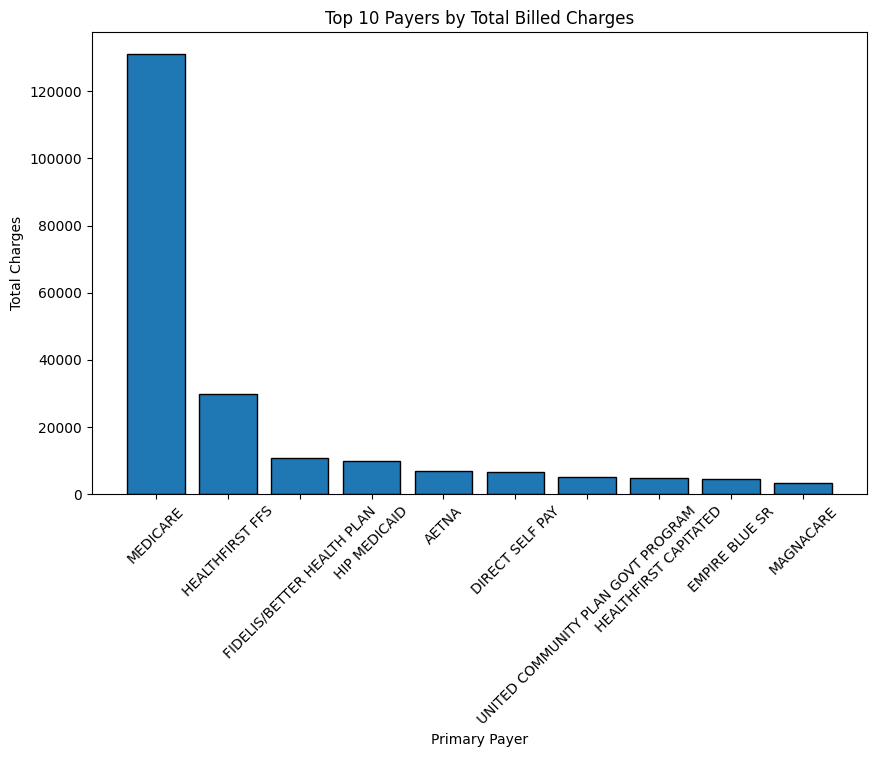

In [40]:
plt.figure(figsize=(10,6))
plt.bar(top10_payers["PrimaryPayerName"], top10_payers["total_charges"], edgecolor="black")
plt.xlabel("Primary Payer")
plt.ylabel("Total Charges")
plt.title("Top 10 Payers by Total Billed Charges")
plt.xticks(rotation=45)
plt.show()



### Interpretation

Based on the chart above, Medicare accounts for the largest share of total billed charges (131,008), significantly exceeding all other payers. The remaining payers contribute to much smaller amounts, indicating that the hospital's reimbursement exposure is concentrated among Medicare claims. 


## Part 4: Creative Analysis  
### Q9 – Which Procedures Generate the Highest Total Charges?

This analysis identifies which HCPCS procedure codes are associated with the highest total billed charges. By merging the LINE and HEADER files, we calculate the total dollar amount billed per procedure type. This helps highlight which services drive the greatest financial impact within the claim period.


In [28]:
# Merge HEADER + LINE
merged_hl = df_header.merge(df_line, on="ProspectiveClaimId", how="inner")

# Total charges by HCPCS code
procedure_charges = (
    merged_hl.groupby("HCPCS")["Charges"]
    .sum()
    .reset_index(name="total_charges")
    .sort_values("total_charges", ascending=False)
)

procedure_charges.head(10)


,HCPCS,total_charges
81,99291,78540
73,99223,17325
76,99233,15840
72,99222,12960
68,99213,10140
64,99204,6610
75,99232,5355
41,90837,5225
47,92933,5160
69,99214,5040


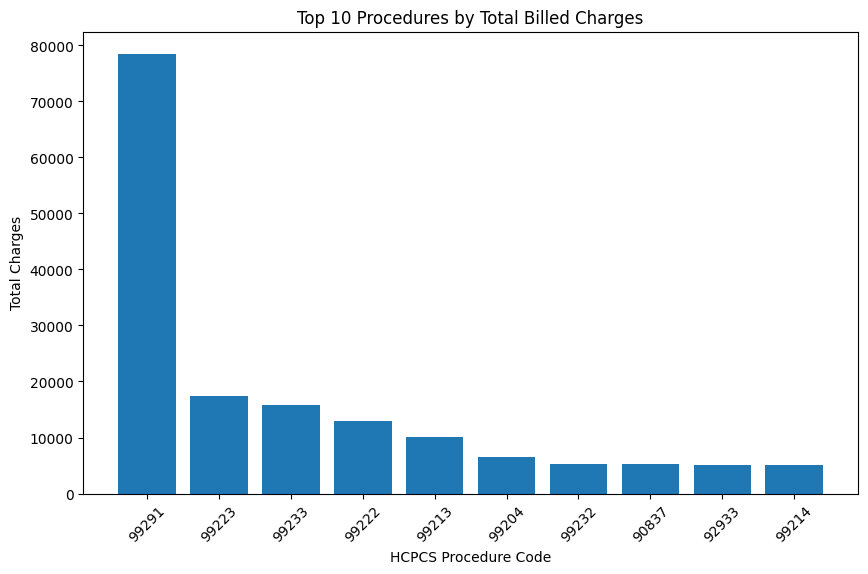

In [29]:
# Take the top 10 highest-charging procedures
top10_procedures = procedure_charges.head(10)

plt.figure(figsize=(10,6))
plt.bar(top10_procedures["HCPCS"], top10_procedures["total_charges"])
plt.xlabel("HCPCS Procedure Code")
plt.ylabel("Total Charges")
plt.title("Top 10 Procedures by Total Billed Charges")
plt.xticks(rotation=45)
plt.show()


### Interpretation

The chart shows the procedures associated with the highest total billed charges during the claim period. HCPCS 99291 generated the highest total charges ($78,540), surpassing the next highest procedure such as 99223. This shows that 99291 is the main driver of financial impact in this dataset, and also helps inform budgeting and payer contract decisions. 
